In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import tensorflow as tf
#Eimport pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler

import numpy as np

gpu_devices = tf.config.experimental.list_physical_devices('GPU')

if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')
    
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Using GPU


In [56]:

Shutdown_Physiologic = pd.read_csv("Shutdown_Physiologic.csv").drop('Unnamed: 0', axis=1).set_index(['case_id','phenotype'])
Shutdown_Physiologic


,,pheno,abQ_ALB_ab,abQ_IGHA1,abQ_IGHA1_2,abQ_IGHA2,abQ_IGHD,abQ_IGHG1,abQ_IGHM_a,abQ_IGHM_b,abQ_IGJ,abQ_IGKC,abQ_IGLC1,abQ_IGLL5,abQ_KV113,abQ_KV204,abQ_KV302,abQ_KV309,abQ_LV302,abQ_MUCB,abQ_TF,pQ1_A2M,pQ1_AHSG,pQ1_ALB_1,pQ1_APOA1,pQ1_APOA2,pQ1_APOB,pQ1_APOC1,pQ1_APOC2,pQ1_APOC3,pQ1_APOD,pQ1_APOH,pQ1_C3,pQ1_C4B,pQ1_CFH,pQ1_CP,pQ1_FGA,pQ1_FGA_b,pQ1_FGB,pQ1_FGB_a,pQ1_FGG_a,pQ1_FGG_b,pQ1_GC,pQ1_HP,pQ1_HPX,pQ1_IGHG1.4,pQ1_IGKC,pQ1_KNG1,pQ1_ORM1,pQ1_RBP4,pQ1_SERPINA1,pQ1_SERPINA3,pQ1_SERPINC1,pQ1_TF,pQ1_TTR,pQ2_ACTG1,pQ2_AFM,pQ2_APCS,pQ2_APOA4,pQ2_APOE,pQ2_AZGP1,pQ2_C2,pQ2_C5,pQ2_C9,pQ2_CLU,pQ2_CPN2,pQ2_F12,pQ2_F2_a,pQ2_F2_b,pQ2_FN1,pQ2_GSN,pQ2_HBA1,pQ2_HBB,pQ2_HBD,pQ2_HRG,pQ2_ITIH1,pQ2_ITIH2,pQ2_KLKB1,pQ2_LRG1,pQ2_PLF4,pQ2_PLG_a,pQ2_PLG_b,pQ2_SAA1,pQ2_SAA4,pQ2_SERPINA4,pQ2_SERPIND1,pQ2_SERPINF2_a,pQ2_SERPINF2_b,pQ2_SERPING1,pQ2_VTN,pQ3_APOL1,pQ3_APOM,pQ3_CA1,pQ3_CPB2,pQ3_CRP_a,pQ3_CRP_b,pQ3_CXCL7,pQ3_F10,pQ3_F11,pQ3_F13B,pQ3_F9,pQ3_LBP,pQ3_MB,pQ3_PROC_a,pQ3_PROC_b,pQ3_PROS1_a,pQ3_PROS1_b,pQ3_S100A9,pQ3_VWF,pQ4_BLVRB,pQ4_ELANE,pQ4_F13A1,pQ4_F3,pQ4_F7,pQ4_FABP1,pQ4_GP5,pQ4_GPX3,pQ4_MBL2,pQ4_MMP2,pQ4_MMP8,pQ4_MMP9,pQ4_MPO,pQ4_PRDX6,pQ4_SELENBP1,pQ4_VIM,pQ5_A1BG,pQ5_A2M,pQ5_AFM,pQ5_AMBP,pQ5_AZGP1,pQ5_B2M,pQ5_C1S,pQ5_C4BPA,pQ5_CFB,pQ5_CFI,pQ5_FABP1,pQ5_GC,pQ5_HPX,pQ5_ITIH4,pQ5_ORM1,pQ5_ORM2,pQ5_RBP4,pQ5_SAA1_A2,pQ5_SERPINC1,pQ5_SERPINF2,pQ5_SERPING1,pQ5_TF,pQ5_TTR,pQ6_C1QB,pQ6_C1QC,pQ6_C1R,pQ6_C7,pQ6_C8A,pQ6_C8B,pQ6_CLEC3B,pQ6_LGALS3BP,pQ6_SERPINA10,pQ6_SERPINA4,pQ6_SERPINA5,pQ6_SERPINA7,pQ7_ATRN,pQ7_C1QA,pQ7_C4BPB,pQ7_CD63,pQ7_CFD,pQ7_CPB2,pQ7_CST3,pQ7_CXCL7,pQ7_DEFA1,pQ7_F12,pQ7_FCN3,pQ7_FETUB,pQ7_GOT1,pQ7_GSTA1,pQ7_GSTM1,pQ7_MPO,pQ7_PARK7,pQ7_PFN1,pQ7_PLAUR,pQ7_PLF4,pQ7_PLUA,pQ7_PON1,pQ7_PRDX5,pQ7_PRG4,pQ7_SERPINA6,pQ7_THBD,pQ8_CPB2,pQ8_CPN1,pQ8_ITIH3,pQ8_KNG1,pQ8_PAR2,pQ8_PLAT,cn_ly30
case_id,phenotype,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C-030,physiological,2,4.295611,-0.375449,-0.395791,-2.614765,-5.532032,2.955352,0.166634,0.383531,-2.611546,2.820561,2.825853,0.615195,-1.213877,0.661227,0.401643,0.986588,-1.052647,0.611825,2.359850,2.524816,0.240003,6.520264,3.095814,2.580579,-1.904933,-0.472251,-0.351895,0.086660,-1.729317,-0.981953,-0.044559,-1.867213,-1.957083,-1.048289,0.905842,0.449425,3.145240,0.916583,1.659408,0.840306,-1.475365,1.865452,0.508526,3.450624,6.653983,-0.895648,3.373338,-0.740823,2.247978,-0.689019,-1.583772,2.617684,-2.740598,-3.902663,-2.597470,-4.405690,-1.982219,-2.507381,-1.756075,-4.219818,-3.327710,-3.645424,-1.527792,-3.339375,-3.125056,-1.154824,-1.475365,-2.203727,-2.264606,-3.007032,-0.839597,-4.396802,-1.872212,-2.050744,-1.720622,-3.226762,-3.681410,-4.550940,-1.822618,-1.790236,-4.875668,-2.608335,-3.350062,-1.886533,-2.233103,-1.996841,-1.247454,-0.513558,-3.586110,-1.753590,-2.046826,-3.147253,-2.300667,-4.101358,-3.536443,-3.094183,-3.530353,-3.001124,-2.840293,-2.672616,-3.936082,-3.394726,-2.380345,-3.259633,-3.136112,-4.762928,-2.754730,-3.905813,-4.361788,-3.826076,-4.227678,-3.986874,-3.991886,-4.025748,-3.130573,-3.856225,-4.065697,-4.267632,-4.298340,-4.251518,-4.243527,-4.086988,-4.285978,-1.370451,0.740253,-2.311359,-2.559764,-1.844744,-4.145348,-3.716931,-1.646287,-1.726529,-2.831280,-4.502471,0.394457,0.508526,-1.113035,0.939091,1.465033,0.456343,-4.803448,0.593326,-2.199855,-0.603250,3.339408,-1.242218,-2.153716,-2.217362,-3.202349,-3.870000,-3.112264,-3.480187,-3.414780,-4.331832,-4.158434,-4.058670,-4.039518,-2.708612,-5.238515,-5.451743,-5.105983,-2.344638,-2.039888,-3.891693,-4.094155,-2.936074,-5.038818,-1.492728,-1.790964,-4.528928,-4.590922,-4.370462,-2.209068,-5.320078,-4.869510,-3.860802,-4.394588,-2.271193,-5.366977,2.401645,-4.974634,-1.507309,0.506232,-1.912834,-3.193661,-3.244599,-3.685464,-0.827410,-1.513303,-4.192641,0.2
C-034,physiological,2,4.374196,0.200082,-3.191656,-2.969118,-5.578199,2.566975,-0.794289,-0.5

In [57]:

dummy_data  = pd.DataFrame(Shutdown_Physiologic.values,  columns=Shutdown_Physiologic.columns)

Shutdown_Physiologic = pd.merge(Shutdown_Physiologic , dummy_data[::-1])


In [58]:
Shutdown_Physiologic[['pheno']].value_counts()

pheno
1        26
2        26
dtype: int64

In [59]:
'''
from sklearn.preprocessing import OneHotEncoder

phenotype_encoder = OneHotEncoder(sparse=False)

phenotype_type_cat = Shutdown_Physiologic[['phenotype']]

phenotype_type_cat_1hot = phenotype_encoder.fit_transform(phenotype_type_cat)

Shutdown_Physiologic['phenotype'] = phenotype_type_cat_1hot
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\n\nphenotype_encoder = OneHotEncoder(sparse=False)\n\nphenotype_type_cat = Shutdown_Physiologic[['phenotype']]\n\nphenotype_type_cat_1hot = phenotype_encoder.fit_transform(phenotype_type_cat)\n\nShutdown_Physiologic['phenotype'] = phenotype_type_cat_1hot\n"

In [60]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)

pheno_type_cat = Shutdown_Physiologic[['pheno']]
pheno_type_cat_1hot = cat_encoder.fit_transform(pheno_type_cat)
Shutdown_Physiologic['pheno'] = pheno_type_cat_1hot



In [61]:

Shutdown_Physiologic.pheno.value_counts()

0.0    26
1.0    26
Name: pheno, dtype: int64

In [62]:
#Shutdown_Physiologic['phenotype'].value_counts()

In [63]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)

pheno_type_cat = Shutdown_Physiologic[['pheno']]
pheno_type_cat_1hot = cat_encoder.fit_transform(pheno_type_cat)
Shutdown_Physiologic['pheno'] = pheno_type_cat_1hot



from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y = Shutdown_Physiologic[['pheno']].values
X = Shutdown_Physiologic.drop("pheno" ,axis=1).values
tree_cls = tree.DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2)

y = np.asarray(y)
X = np.asarray(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [82]:
tree_cls.fit(X_train, y_train)

pretree = tree_cls.predict(X_test)

In [83]:
acc_score = accuracy_score(pretree, y_test)
acc_score

0.6923076923076923

In [84]:
from sklearn.linear_model import Perceptron


In [85]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X_train, y_train)

Perceptron(random_state=42)

In [86]:
y_pred = per_clf.predict(X_test)

In [87]:
mlp_acc_score = accuracy_score(y_pred, y_test)
mlp_acc_score

0.38461538461538464

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42, max_iter=250)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)


for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6153846153846154
RandomForestClassifier 0.7692307692307693
SVC 0.46153846153846156
VotingClassifier 0.6923076923076923


In [89]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)


for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6153846153846154
RandomForestClassifier 0.7692307692307693
SVC 0.46153846153846156
VotingClassifier 0.6153846153846154


In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=10, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6153846153846154


In [91]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.7692307692307693


In [92]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred_Bagging = bag_clf.predict(X_test)

print(accuracy_score(y_pred_Bagging, y_test))

0.7692307692307693


In [93]:

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_pred_rf, y_test))

0.6153846153846154


In [94]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.6153846153846154

In [95]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)


y_pred_ada_clf = ada_clf.predict(X_test)

print(accuracy_score(y_pred_ada_clf, y_test))

0.5384615384615384


In [79]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (13,) and arg 1 with shape (39,).

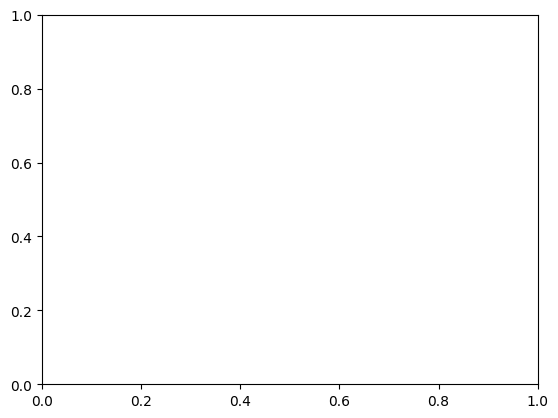

In [80]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

In [ ]:

np.sum(pca.explained_variance_ratio_)

In [ ]:


rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X_train, y_train)
for name, score in zip(Shutdown_Physiologic.columns, rnd_clf.feature_importances_):
    print(name, score)

In [ ]:
tf.keras.losses.binary_crossentropy

In [ ]:
# Set the learning rates & results storage
#learning_rates = [0.0001, 0.009, 0.001, 0.015, 0.7, 0.9]
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.001, 0.012, 0.2, 0.5, 0.7, 0.9]

results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])

print(results_df)

In [ ]:
# Set the learning rates & accuracies list
import matplotlib.pyplot as plt

learn_rates = np.linspace(0.02, 0.75, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

In [ ]:
# Create the function
def gbm_grid_search(learning_rate, max_depth):

	# Create the model
    model = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth)
    
    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Return the hyperparameters and score
    return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

In [ ]:
# Create the relevant lists
results_list = []
learn_rate_list = np.linspace(0.02, 0.05, num=30)

#learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2,4,6,8,10]

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate,max_depth))

#resultsdf =  pd.DataFrame(results_list, columns=['learingRate', 'max_depth', 'accuracies'])


In [ ]:
resultsdf =  pd.DataFrame(results_list, columns=['learingRate', 'max_depth', 'accuracies'])
resultsdf[resultsdf['accuracies'] > .75]

In [ ]:
resultsdf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=resultsdf["price"]/100, label="price", figsize=(15,12),
    c="rating", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()